<a href="https://colab.research.google.com/github/WesleyVictors/python2/blob/main/dataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os exercicios foram feitos aqui no colab, por que o JupyterLite tem limitações importantes quanto às bibliotecas Python (seaborn e o plotly ), porque ele roda no navegador com Pyodide, e nem todas as bibliotecas funcionam nele.

Q2.

Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna comparecimento.



seaborn

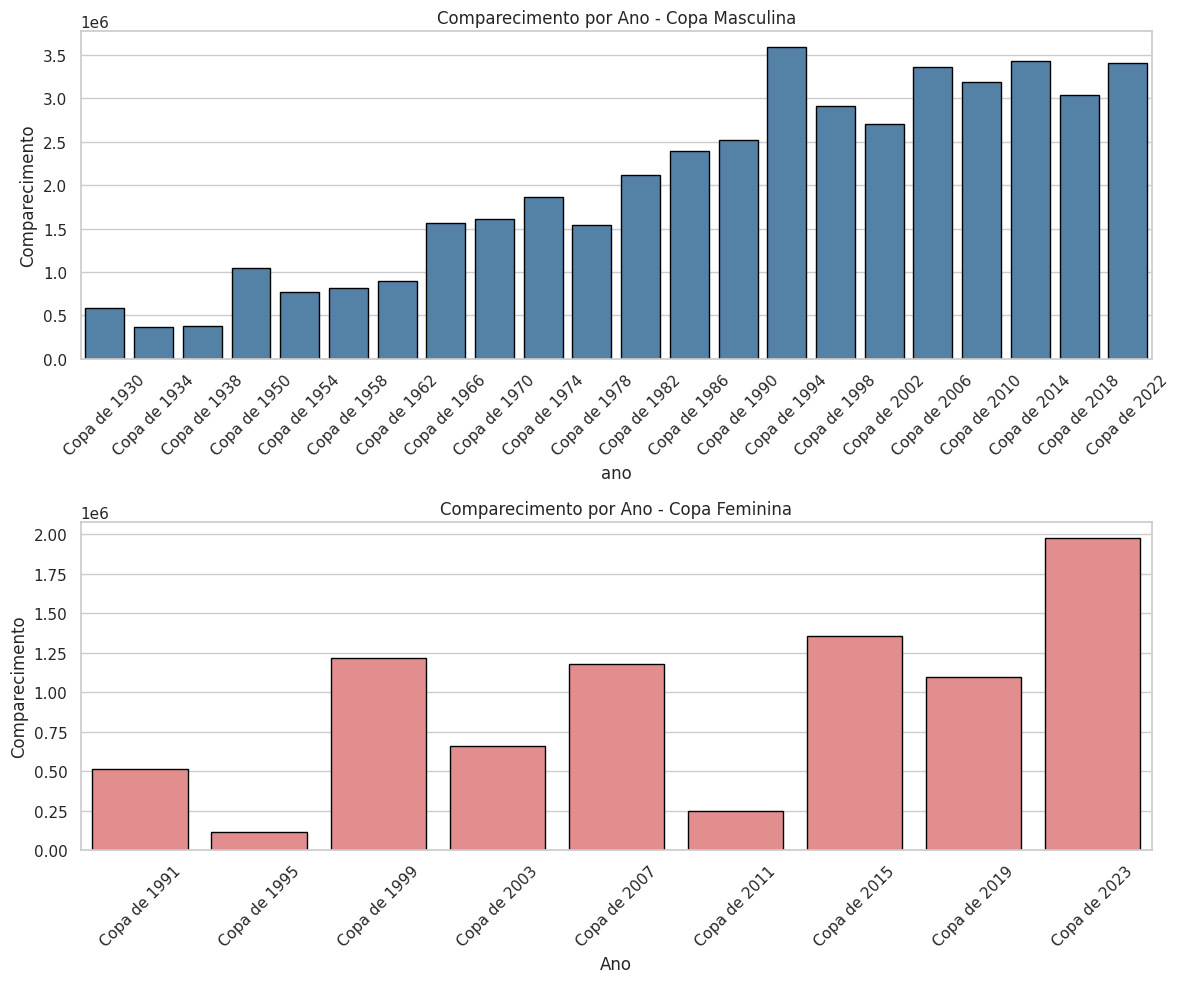

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/wc_formatado.csv')
df = df[df['comparecimento'] > 0].dropna(subset=['comparecimento'])

masculina = df[df['copa'].str.lower() == 'masculina']
feminina = df[df['copa'].str.lower() == 'feminina']

cmp_masculina = masculina.groupby('ano')['comparecimento'].sum().reset_index()
cmp_feminina = feminina.groupby('ano')['comparecimento'].sum().reset_index()


cmp_masculina['ano'] = cmp_masculina['ano'].astype(str).apply(lambda x: f'Copa de {x}')
cmp_feminina['ano'] = cmp_feminina['ano'].astype(str).apply(lambda x: f'Copa de {x}')


sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)


sns.barplot(data=cmp_masculina, x='ano', y='comparecimento', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Comparecimento por Ano - Copa Masculina')
axes[0].set_ylabel('Comparecimento')
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(data=cmp_feminina, x='ano', y='comparecimento', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Comparecimento por Ano - Copa Feminina')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Comparecimento')
axes[1].tick_params(axis='x', rotation=45)#rotacionar os titulos dos eixos

plt.tight_layout()
plt.show()


Q2.

Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna comparecimento.

matplotlib

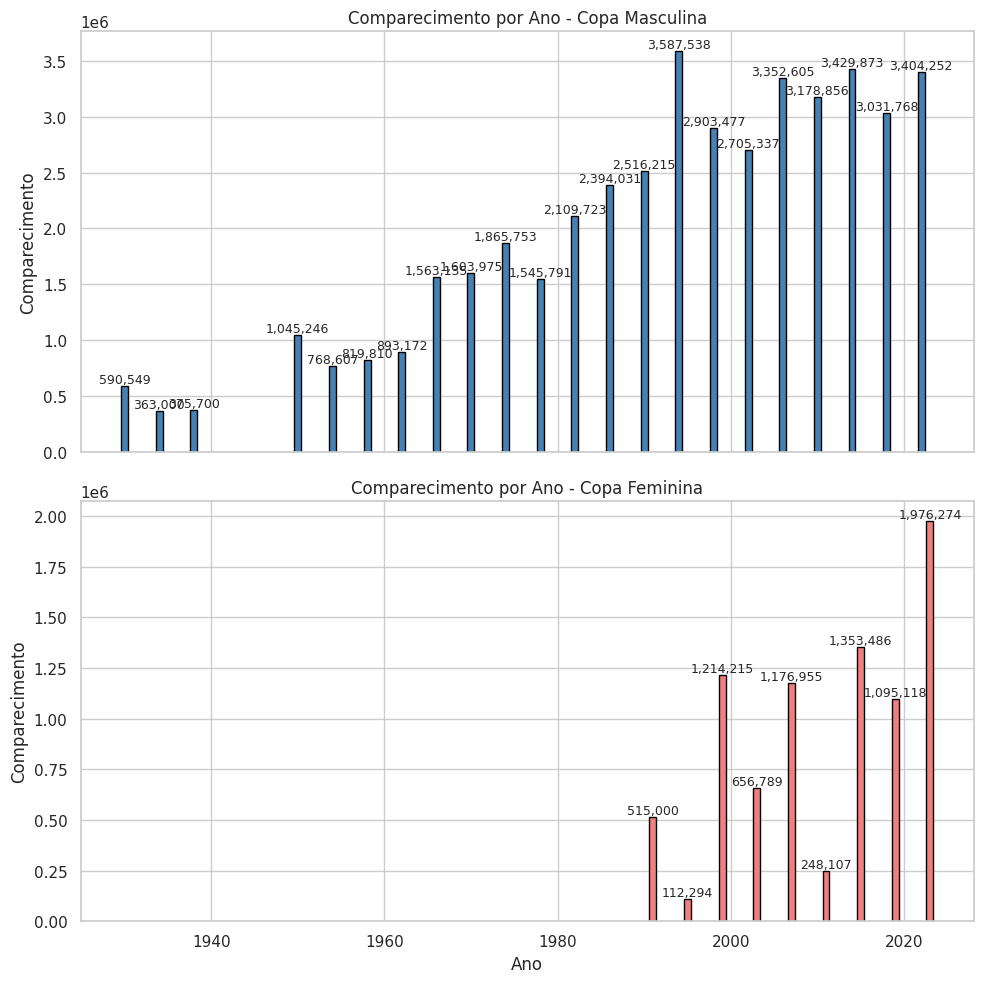

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('/wc_formatado.csv')
df = df[df['comparecimento'] > 0].dropna(subset=['comparecimento'])


masculina = df[df['copa'].str.lower() == 'masculina']
feminina = df[df['copa'].str.lower() == 'feminina']


cmp_masculina = masculina.groupby('ano')['comparecimento'].sum()
cmp_feminina = feminina.groupby('ano')['comparecimento'].sum()


fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

bars1 = axes[0].bar(cmp_masculina.index, cmp_masculina.values,
                    color='steelblue', edgecolor='black')
axes[0].set_title('Comparecimento por Ano - Copa Masculina')
axes[0].set_ylabel('Comparecimento')
axes[0].grid(True, axis='y')

for bar in bars1:
    altura = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, altura,
                 f'{int(altura):,}', ha='center', va='bottom', fontsize=9)

bars2 = axes[1].bar(cmp_feminina.index, cmp_feminina.values,
                    color='lightcoral', edgecolor='black')
axes[1].set_title('Comparecimento por Ano - Copa Feminina')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Comparecimento')
axes[1].grid(True, axis='y')

for bar in bars2:
    altura = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2, altura, f'{altura:,.0f}', ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.show()


Q2.

Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna comparecimento.


plotly

In [18]:
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv('/wc_formatado.csv')
df = df[df['comparecimento'] > 0].dropna(subset=['comparecimento'])


masculina = df[df['copa'].str.lower() == 'masculina']
feminina = df[df['copa'].str.lower() == 'feminina']


cmp_masculina = masculina.groupby('ano')['comparecimento'].sum()
cmp_feminina = feminina.groupby('ano')['comparecimento'].sum()


x_labels_masc = [f'Copa de {ano}' for ano in cmp_masculina.index]
x_labels_fem = [f'Copa de {ano}' for ano in cmp_feminina.index]

fig = go.Figure()


fig.add_trace(go.Bar(
    x=x_labels_masc,
    y=cmp_masculina.values,
    name='Masculina',
    marker_color='steelblue',
    text=[f'{v:,.0f}' for v in cmp_masculina.values],
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=x_labels_fem,
    y=cmp_feminina.values,
    name='Feminina',
    marker_color='lightcoral',
    text=[f'{v:,.0f}' for v in cmp_feminina.values],
    textposition='outside'
))


fig.update_layout(
    title='Comparecimento por Ano - Copas Masculina e Feminina',
    barmode='group',
    xaxis_title='Ano',
    yaxis_title='Comparecimento',
    plot_bgcolor='white',
    xaxis=dict(tickangle=-45),  # rotaciona os rótulos do eixo x para 45 graus
    yaxis=dict(gridcolor='lightgray'),
    height=500
)

fig.show()


Q3.

Apresente um gráfico de dispersão (scatter) dos atributos gols_1 e gols_2. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir

gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))

matplotlib

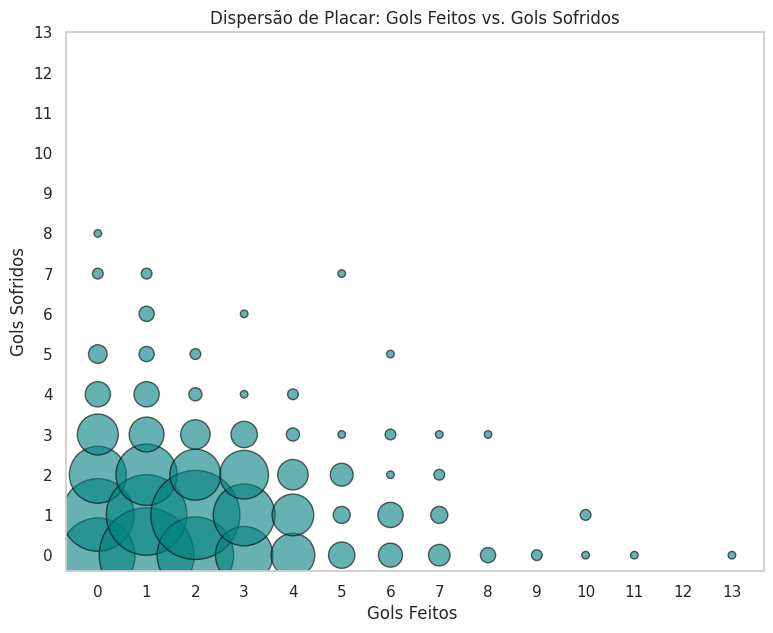

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/wc_formatado.csv')
df = df.dropna(subset=['gols_1', 'gols_2'])

agrupado = df.groupby(['gols_1', 'gols_2']).size().reset_index(name='frequencia')


max_gols = int(max(df['gols_1'].max(), df['gols_2'].max()))


plt.figure(figsize=(9, 7))
plt.scatter(
    agrupado['gols_1'],
    agrupado['gols_2'],
    s=agrupado['frequencia'] * 30,  # multiplica para ajustar visualmente
    alpha=0.6,
    color='teal',
    edgecolors='black'
)


plt.title('Dispersão de Placar: Gols Feitos vs. Gols Sofridos')
plt.xlabel('Gols Feitos ')
plt.ylabel('Gols Sofridos')
plt.grid(False)


plt.xticks(range(0, max_gols + 1))
plt.yticks(range(0, max_gols + 1))

plt.show()


Q3.

Apresente um gráfico de dispersão (scatter) dos atributos gols_1 e gols_2. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir

gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))



Seaborn

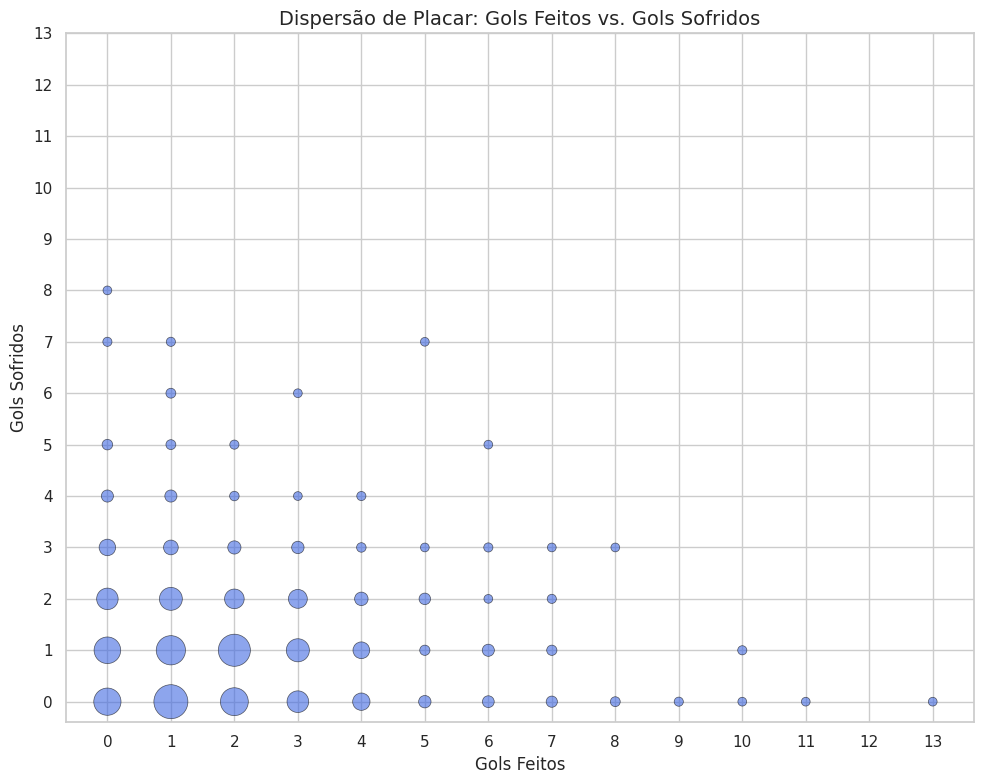

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/wc_formatado.csv')
df = df.dropna(subset=['gols_1', 'gols_2'])


agrupado = df.groupby(['gols_1', 'gols_2']).size().reset_index(name='frequencia')


max_gols = int(max(df['gols_1'].max(), df['gols_2'].max()))


sns.set(style="whitegrid", palette="muted")


plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=agrupado,
    x='gols_1',
    y='gols_2',
    size='frequencia',
    sizes=(40, 600),
    color='royalblue',
    legend=False,
    edgecolor='black',
    alpha=0.6
)

plt.title('Dispersão de Placar: Gols Feitos vs. Gols Sofridos', fontsize=14)
plt.xlabel('Gols Feitos')
plt.ylabel('Gols Sofridos')
plt.xticks(range(0, max_gols + 1))
plt.yticks(range(0, max_gols + 1))
plt.grid(True)
plt.tight_layout()
plt.show()


Q3.

Apresente um gráfico de dispersão (scatter) dos atributos gols_1 e gols_2. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir

gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))


Plotly

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv('/wc_formatado.csv')
df = df.dropna(subset=['gols_1', 'gols_2'])


agrupado = df.groupby(['gols_1', 'gols_2']).size().reset_index(name='frequencia')


fig = px.scatter(
    agrupado,
    x='gols_1',
    y='gols_2',
    size='frequencia',
    color='frequencia',
    color_continuous_scale='Viridis',
    size_max=40,
    title='Dispersão de Placar: Gols Feitos vs. Gols Sofridos',
    labels={
        'gols_1': 'Gols Feitos',
        'gols_2': 'Gols Sofridos',
        'frequencia': 'Frequência'
    }
)


fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

fig.show()


Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:

https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:

matplotlib

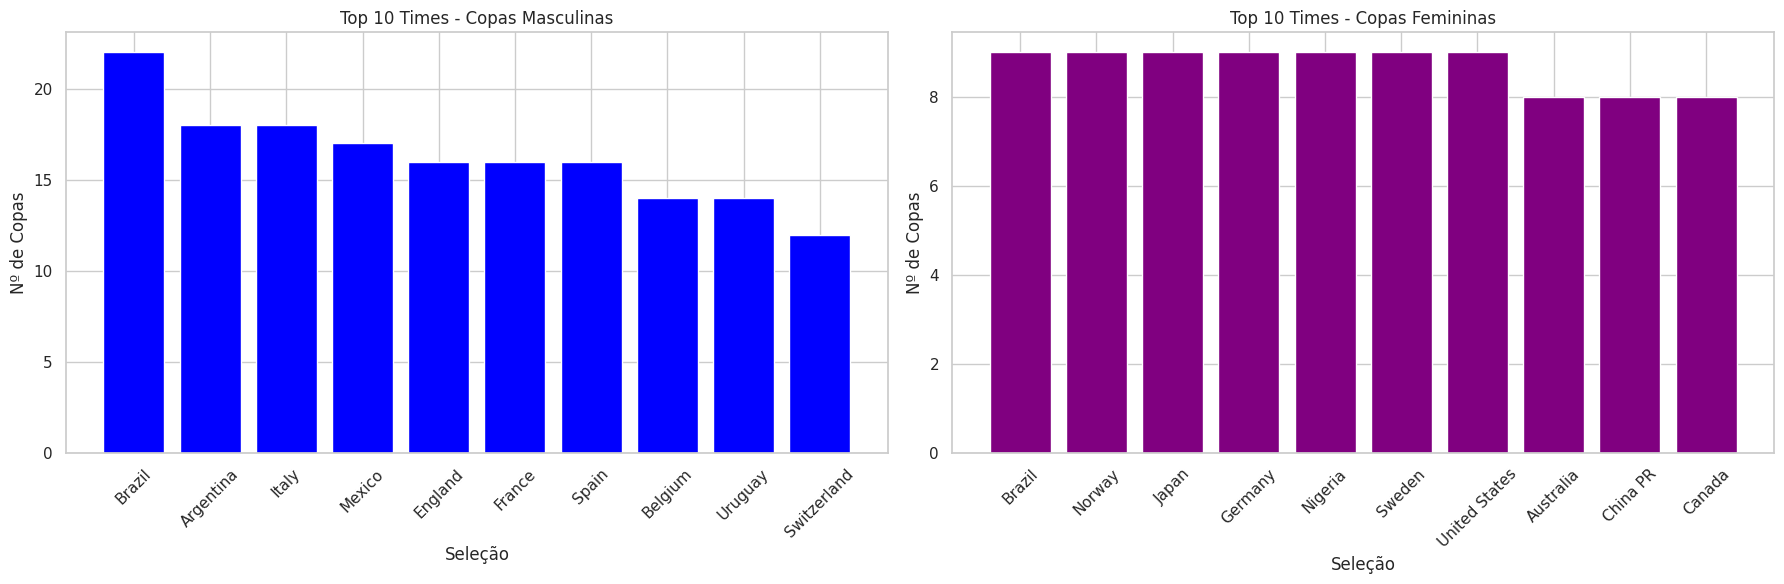

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/wc_formatado.csv')

masculina_casa = df[df['copa'].str.lower() == 'masculina'][['time_1','ano']].reset_index(drop=True)
masculina_fora = df[df['copa'].str.lower() == 'masculina'][['time_2','ano']].reset_index(drop=True)
#rename
masculina_casa = masculina_casa.rename(columns={'time_1': 'time'})
masculina_fora = masculina_fora.rename(columns={'time_2' : 'time'})

total_masculina = pd.concat([masculina_casa, masculina_fora])


#### filtragem
participacoes = total_masculina.groupby('time')['ano'].nunique().reset_index()

## ordenação   descrescente
top_masculino = participacoes.sort_values(by='ano', ascending=False)


feminina_casa = df[df['copa'].str.lower() == 'feminina'][['time_1','ano']].reset_index(drop=True)
feminina_fora = df[df['copa'].str.lower() == 'feminina'][['time_2','ano']].reset_index(drop=True)

#renomear
feminina_casa = feminina_casa.rename(columns={'time_1': 'time'})
feminina_fora = feminina_fora.rename(columns={'time_2': 'time'})

#união casa/fora
total_feminina = pd.concat([feminina_casa, feminina_fora])

#filtragem
participacao_fem = total_feminina.groupby('time')['ano'].nunique().reset_index()


## ordenação   descrescente
top_feminina = participacao_fem.sort_values(by='ano', ascending=False)


##
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Top 10 seleções masculinas com mais participações
ax1.bar(top_masculino['time'][:10], top_masculino['ano'][:10], color='blue')
ax1.set_title('Top 10 Times - Copas Masculinas')
ax1.set_xlabel('Seleção')
ax1.set_ylabel('Nº de Copas')
ax1.tick_params(axis='x', rotation=45)

# Top 10 seleções femininas com mais participações
ax2.bar(top_feminina['time'][:10], top_feminina['ano'][:10], color='purple')
ax2.set_title('Top 10 Times - Copas Femininas')
ax2.set_xlabel('Seleção')
ax2.set_ylabel('Nº de Copas')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()






Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:

    https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:


Seaborn

/tmp/ipython-input-4-3616199110.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_masculino, x='time', y='copas', palette='Blues_d', ax=axes[0])
/tmp/ipython-input-4-3616199110.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_feminina, x='time', y='copas', palette='Purples_d', ax=axes[1])


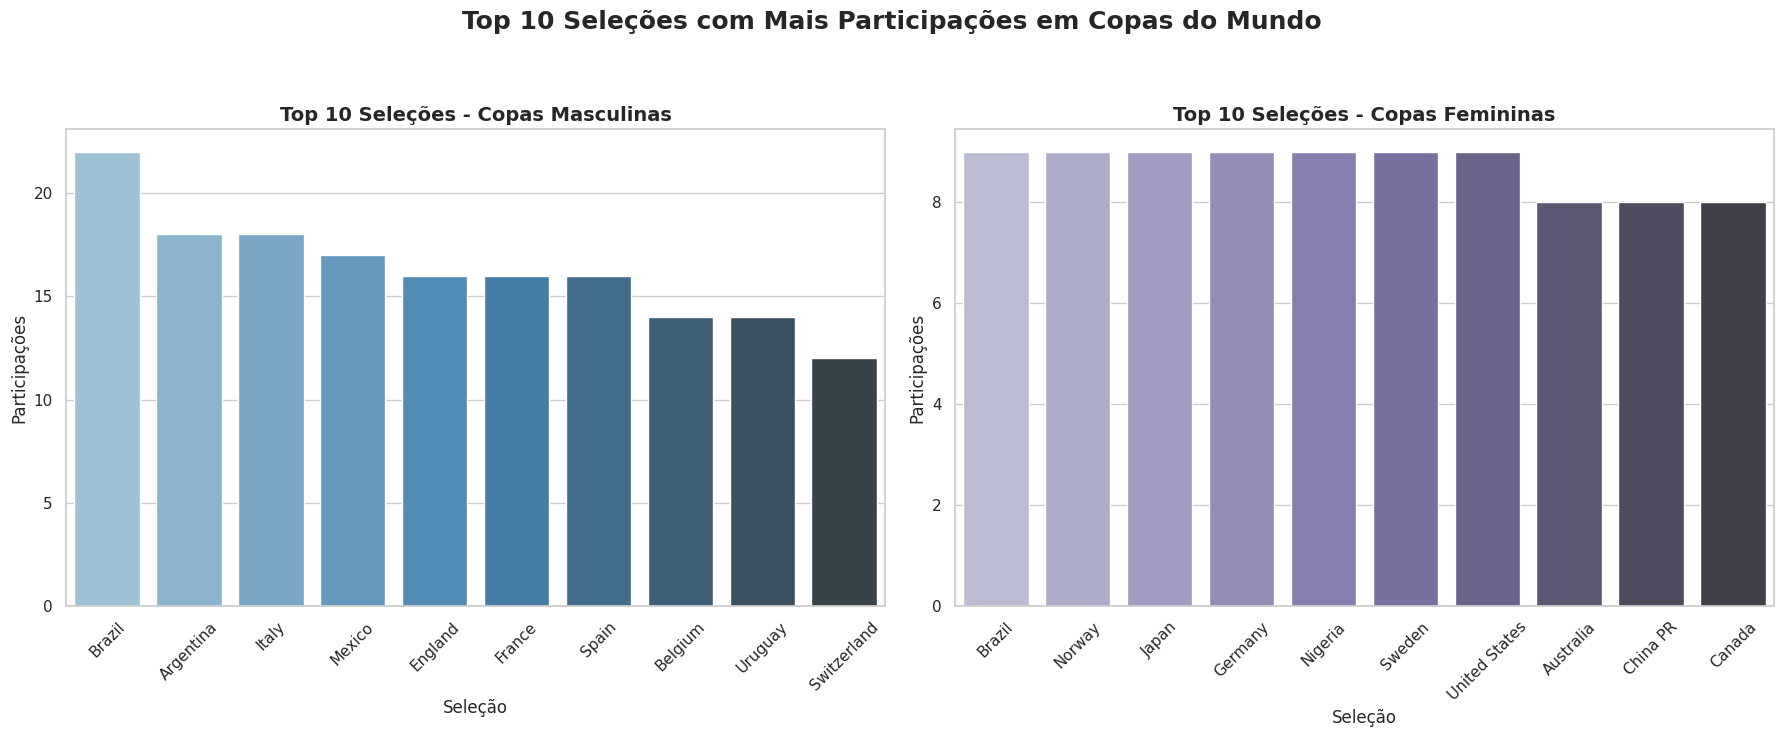

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilodo seaborn
sns.set_theme(style='whitegrid')
#carregamento usado no colab ( ja que as extensões não funciona no jupyter notebook)
df = pd.read_csv('/wc_formatado.csv')


masculina_casa = df[df['copa'].str.lower() == 'masculina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
masculina_fora = df[df['copa'].str.lower() == 'masculina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_masculina = pd.concat([masculina_casa, masculina_fora])
participacoes_masc = total_masculina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_masculino = participacoes_masc.sort_values(by='copas', ascending=False).head(10)


feminina_casa = df[df['copa'].str.lower() == 'feminina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
feminina_fora = df[df['copa'].str.lower() == 'feminina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_feminina = pd.concat([feminina_casa, feminina_fora])
participacoes_fem = total_feminina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_feminina = participacoes_fem.sort_values(by='copas', ascending=False).head(10)


fig, axes = plt.subplots(1, 2, figsize=(18, 7))


sns.barplot(data=top_masculino, x='time', y='copas', palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 Seleções - Copas Masculinas', fontsize=14, weight='bold')
axes[0].set_xlabel('Seleção')
axes[0].set_ylabel('Participações')
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(data=top_feminina, x='time', y='copas', palette='Purples_d', ax=axes[1])
axes[1].set_title('Top 10 Seleções - Copas Femininas', fontsize=14, weight='bold')
axes[1].set_xlabel('Seleção')
axes[1].set_ylabel('Participações')
axes[1].tick_params(axis='x', rotation=45)


fig.suptitle('Top 10 Seleções com Mais Participações em Copas do Mundo', fontsize=18, weight='bold', y=1.05)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:

    https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:

Plotly

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


#carregamento usado no colab ( ja que as extensões não funciona no jupyter notebook)
df = pd.read_csv('/wc_formatado.csv')


masculina_casa = df[df['copa'].str.lower() == 'masculina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
masculina_fora = df[df['copa'].str.lower() == 'masculina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_masculina = pd.concat([masculina_casa, masculina_fora])
participacoes_masc = total_masculina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_masculino = participacoes_masc.sort_values(by='copas', ascending=False).head(10)

feminina_casa = df[df['copa'].str.lower() == 'feminina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
feminina_fora = df[df['copa'].str.lower() == 'feminina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_feminina = pd.concat([feminina_casa, feminina_fora])
participacoes_fem = total_feminina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_feminina = participacoes_fem.sort_values(by='copas', ascending=False).head(10)


fig = make_subplots(rows=1, cols=2, subplot_titles=(
    "Top 10 Seleções - Copas Masculinas",
    "Top 10 Seleções - Copas Femininas"
))


fig.add_trace(
    go.Bar(x=top_masculino['time'], y=top_masculino['copas'],
           name='Masculino', marker_color='royalblue'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=top_feminina['time'], y=top_feminina['copas'],
           name='Feminino', marker_color='mediumpurple'),
    row=1, col=2
)


fig.update_layout(
    title_text='Top 10 Seleções com Mais Participações em Copas do Mundo',
    title_x=0.5,
    height=600,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title_text="Seleção", tickangle=45, row=1, col=1)
fig.update_yaxes(title_text="Nº de Copas", row=1, col=1)
fig.update_xaxes(title_text="Seleção", tickangle=45, row=1, col=2)
fig.update_yaxes(title_text="Nº de Copas", row=1, col=2)

fig.show()


Q5.

Vamos fazer um compilado com as estatísticas históricas de copas do mundo!

Com a biblioteca de sua preferência você deve criar 4 subplots organizados em um grid de 2 linhas e 2 colunas. Eles devem conter os seguintes gráficos:

    Linha 1, coluna 1: Gráfico de barras com a quantidade de jogos que aconteceram por ano
    Linha 1, coluna 2: Gráfico de área (referências a seguir) com o total de gols por ano, separando as informações de gols_1 e gols_2 para distinguir gols em casa e do time visitante.
    Linha 2, coluna 1: Gráfico de área com o total de cartões por ano, separando as informações de cartões amarelos e cartões vermelhos, mas agregando cartões do time 1 ou time 2. Ou seja, uma área com cartao_amarelo_1 + cartao_amarelo_2 e outra área com cartao_vermelho_1 + cartao_vermelho_2.
    Linha 2, coluna 2: Gráfico de barras com o total de gols contra por ano, somando gols_contra_1 e gols_contra_2.


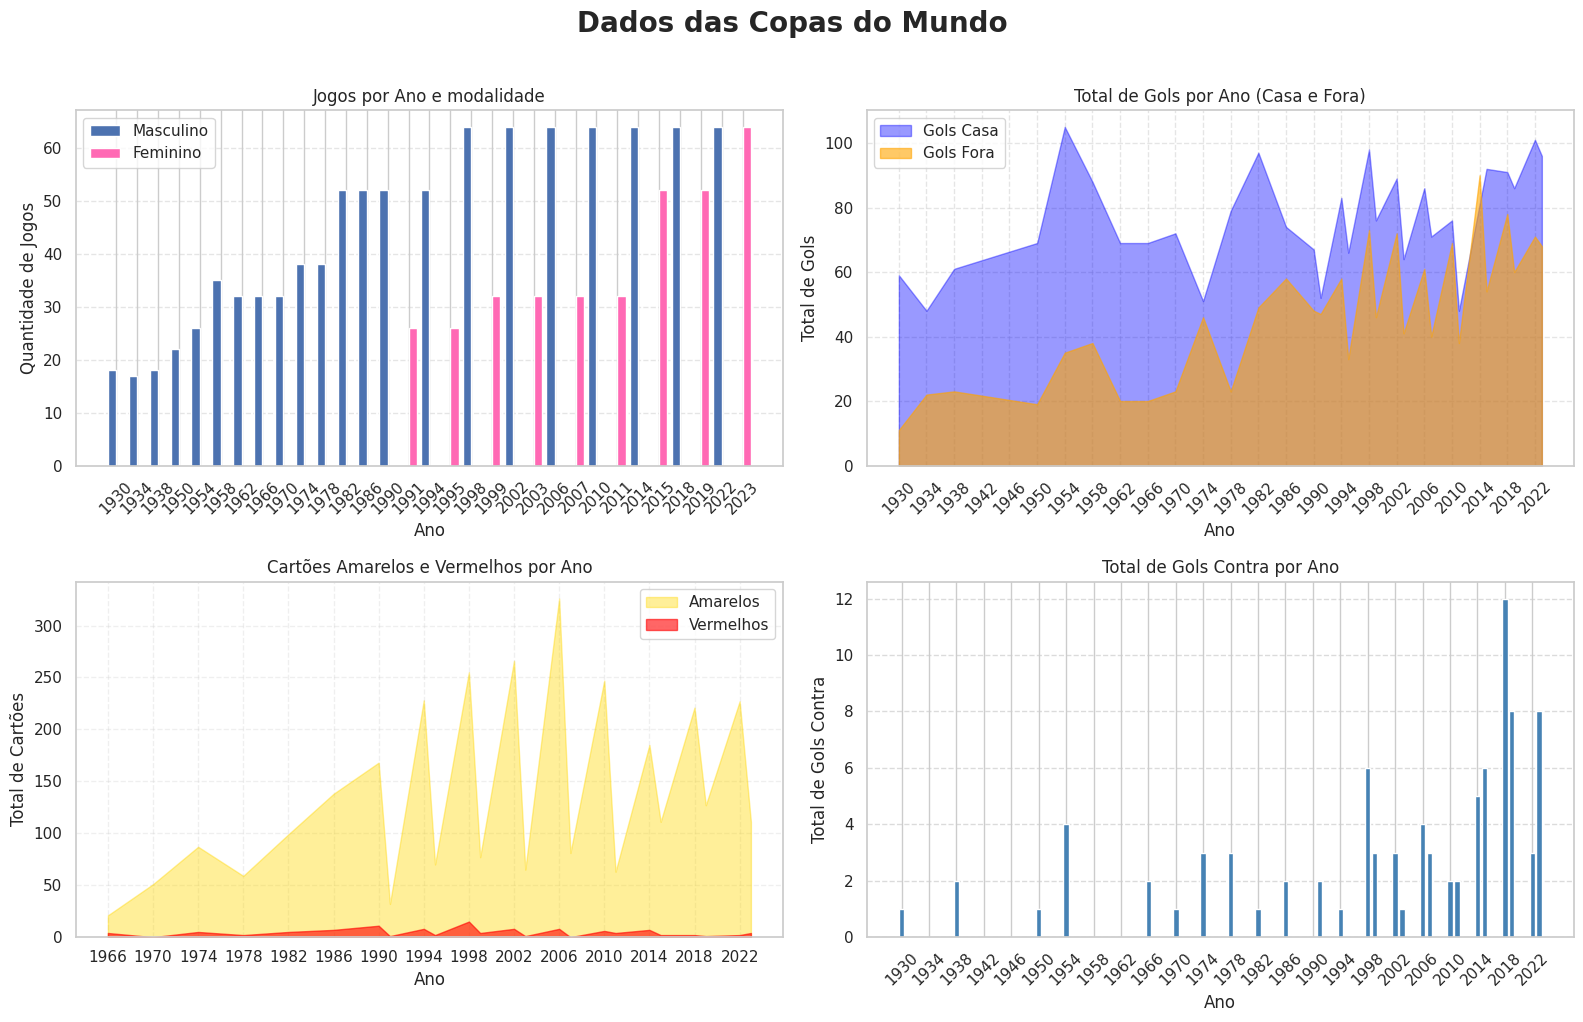

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv('/wc_formatado.csv')

# --- Gráfico 1: Quantidade de jogos por ano
historico = df[['ano', 'gols_1', 'gols_2',
                'cartao_amarelo_1', 'cartao_amarelo_2',
                'cartao_vermelho_1', 'cartao_vermelho_2',
                'gols_1_contra', 'gols_2_contra', 'copa']]

jogos_por_ano_copa = historico.groupby(['ano', 'copa']).size().unstack(fill_value=0).sort_index()
anos1 = jogos_por_ano_copa.index
masculino = jogos_por_ano_copa.get('Masculina', pd.Series([0]*len(anos1), index=anos1))
feminino = jogos_por_ano_copa.get('Feminina', pd.Series([0]*len(anos1), index=anos1))
x = np.arange(len(anos1))
largura = 0.4







# --- Gráfico 2: Total de gols por ano
total_gols = df[['ano', 'gols_1', 'gols_2']]
gols_por_ano = total_gols.groupby('ano').sum().reset_index()
gols_por_ano = gols_por_ano[gols_por_ano['ano'] >= 1930]
anos2 = gols_por_ano['ano']





# --- Gráfico 3: Cartões por ano
def contar_cartoes(celula):
    if pd.isna(celula) or celula.strip() == '':
        return 0
    return len(celula.split(','))

df['amarelos_1'] = df['cartao_amarelo_1'].apply(contar_cartoes)
df['amarelos_2'] = df['cartao_amarelo_2'].apply(contar_cartoes)
df['vermelhos_1'] = df['cartao_vermelho_1'].apply(contar_cartoes)
df['vermelhos_2'] = df['cartao_vermelho_2'].apply(contar_cartoes)
df['cartoes_amarelos'] = df['amarelos_1'] + df['amarelos_2']
df['cartoes_vermelhos'] = df['vermelhos_1'] + df['vermelhos_2']
cartoes_por_ano = df.groupby('ano')[['cartoes_amarelos', 'cartoes_vermelhos']].sum().reset_index()
cartoes_por_ano = cartoes_por_ano[cartoes_por_ano['ano'] >= 1966]
anos3 = cartoes_por_ano['ano']
amarelos = cartoes_por_ano['cartoes_amarelos']
vermelhos = cartoes_por_ano['cartoes_vermelhos']




# --- Gráfico 4: Gols contra por ano
historico_contra = df[['ano', 'gols_1_contra', 'gols_2_contra']].copy()
def contar_gols_contra(celula):
    if pd.isna(celula): return 0
    celula = celula.strip()
    if celula == '': return 0
    return len(celula.split('|'))
historico_contra['gols_1_contra_qtd'] = historico_contra['gols_1_contra'].apply(contar_gols_contra)
historico_contra['gols_2_contra_qtd'] = historico_contra['gols_2_contra'].apply(contar_gols_contra)
historico_contra['total_gols_contra'] = historico_contra['gols_1_contra_qtd'] + historico_contra['gols_2_contra_qtd']
historico_contra = historico_contra[historico_contra['ano'] >= 1930]
gols_contra_por_ano = historico_contra.groupby('ano')['total_gols_contra'].sum().reset_index()





fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1 - Jogos por ano
axs[0, 0].bar(x - largura/2, masculino, width=largura, label='Masculino', color='#4C72B0')
axs[0, 0].bar(x + largura/2, feminino, width=largura, label='Feminino', color='#FF69B4')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(anos1, rotation=45)
axs[0, 0].set_title('Jogos por Ano e modalidade')
axs[0, 0].set_xlabel('Ano')
axs[0, 0].set_ylabel('Quantidade de Jogos')
axs[0, 0].legend()
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.5)




# Gráfico 2 - Gols por ano0
axs[0, 1].fill_between(gols_por_ano['ano'], gols_por_ano['gols_1'], alpha=0.4, label='Gols Casa', color='blue')
axs[0, 1].fill_between(gols_por_ano['ano'], gols_por_ano['gols_2'], alpha=0.6, label='Gols Fora', color='orange')
axs[0, 1].set_title('Total de Gols por Ano (Casa e Fora)')
axs[0, 1].set_xlabel('Ano')
axs[0, 1].set_ylabel('Total de Gols')
axs[0, 1].legend()
axs[0, 1].grid(True, linestyle='--', alpha=0.5)
axs[0, 1].set_ylim(bottom=0)
#axs[0, 1].set_xticks(np.arange(min(anos3), max(anos3)+1, 4))
ticks = np.arange(min(anos2), max(anos2)+1, 4)
axs[0, 1].set_xticks(ticks)
axs[0, 1].set_xticklabels(ticks, rotation=45)





# Gráfico 3 - Cartões
axs[1, 0].fill_between(anos3, amarelos, color='gold', alpha=0.4, label='Amarelos', zorder=1)
axs[1, 0].fill_between(anos3, vermelhos, color='red', alpha=0.6, label='Vermelhos', zorder=2)
axs[1, 0].set_title('Cartões Amarelos e Vermelhos por Ano')
axs[1, 0].set_xlabel('Ano')
axs[1, 0].set_ylabel('Total de Cartões')
axs[1, 0].legend()
axs[1, 0].grid(True, linestyle='--', alpha=0.3)
axs[1, 0].set_ylim(bottom=0)
axs[1, 0].set_xticks(np.arange(min(anos3), max(anos3)+1, 4))

# Gráfico 4 - Gols Contra
axs[1, 1].bar(gols_contra_por_ano['ano'], gols_contra_por_ano['total_gols_contra'], color='steelblue')
axs[1, 1].set_title('Total de Gols Contra por Ano')
axs[1, 1].set_xlabel('Ano')
axs[1, 1].set_ylabel('Total de Gols Contra')
axs[1, 1].set_xticks(np.arange(gols_contra_por_ano['ano'].min(), gols_contra_por_ano['ano'].max()+1, 4))
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

fig.suptitle('Dados das Copas do Mundo', fontsize=20, weight='bold', y=1.02)


plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()
